# Crossing Angles and Hourglass Effect

0. [Calculation](#chapter0)
1. [Solving integral wrt s](#chapter1)
2. [Varying Parameters](#chapter2)\
    2.1 [$\beta^*_x$](#chapter2.1)\
    2.2 [$\beta^*_y$](#chapter2.2)\
    2.3 [$\phi_c$](#chapter2.3)\
    2.4 [$\sigma_z$](#chapter2.4)

## 0.  Calculation <a name="chapter0"></a>

### Change of coordinates:
$x_1 = x\cos\frac{\phi}{2} - s\sin\frac{\phi}{2}; s_1 = s\cos\frac{\phi}{2} + x\sin\frac{\phi}{2}$\
$x_2 = x\cos\frac{\phi}{2} + s\sin\frac{\phi}{2}; s_2 = s\cos\frac{\phi}{2} - x\sin\frac{\phi}{2}$

$L_0 = \frac{fN_1N_2}{4\pi\sigma_{0x}\sigma_{0y}}$\
where $\sigma_{0i} = \sqrt{\epsilon_i\beta}$\
and $\beta(s) = \beta^*(1 + (\frac{s}{\beta^*})^2)$\
where $\beta^* = \beta(s = 0)$

Relativistic Factor:\
$K = 2\cos^2\frac{\phi}{2}$

### Luminosity:
$L = 2\cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\rho_1(x_1, y_1, s_1, s_{01})\rho_2(x_2, y_2, s_2, s_{02}) dxdydsds_0$

$ = \cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{4\pi^3\beta^2\epsilon_x\epsilon_y\sigma_z^2}
\exp(-\frac{x_1^2}{2\sigma_x^2})\exp(-\frac{y_1^2}{2\sigma_y^2})\exp(-\frac{(s_1 - s_0)^2}{2\sigma_z^2}) 
\exp(-\frac{x_2^2}{2\sigma_x^2})\exp(-\frac{y_2^2}{2\sigma_y^2})\exp(-\frac{(s_2 + s_0)^2}{2\sigma_z^2})
dxdydsds_0$

Integrate wrt y:

$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^{5/2}\sigma_x^2\sigma_y\sigma_z^2}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{s_1^2 + s_2^2 + 2s_0^2 + 2s_0(s_2 - s_1)}{2\sigma_z^2})
dxdsds_0$

and s0:
$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^2\sigma_x^2\sigma_y\sigma_z}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{s_1^2 + s_2^2 + 2(s_2 - s_1)^2}{2\sigma_z^2}) 
dxds$

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\sigma_x^2\sigma_y\sigma_z}
$exp$(-(\frac{ s^2\sin^2(\frac{\phi}{2})) + x^2\cos^2(\frac{\phi}{2}) }{\sigma_x^2})) 
$exp$(-(\frac{ s^2\cos^2(\frac{\phi}{2}) }{\sigma_z^2})) dxds$

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\sigma_x^2\sigma_y\sigma_z}
$exp$(-x^2(\frac{ \cos^2(\frac{\phi}{2}) }{\sigma_x^2}))
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} )) dxds$

Integrate wrt x:

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x^2\sigma_y\sigma_z
\frac{ \cos(\frac{\phi}{2}) }{\sigma_x}}
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} )) ds$

$= \cos(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x\sigma_y\sigma_z}
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} )) ds$

## 1. Solving integral wrt s: <a name="chapter1"></a>

In [1]:
# Libraries
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [12]:
#Integrand to evaluate wrt s
# Parameters given: f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, ex, ey, sz, phi

# This is the new version with the correction 
def Integrand(s, f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi):
    beta_x = bsx*(1 + ((s - ssx)/bsx)**2)
    beta_y = bsy*(1 + ((s - ssy)/bsy)**2)
    sx = np.sqrt(ex*beta_x)
    sy = np.sqrt(ey*beta_y)
    
    denom = 4*np.pi**1.5 * sx*sy*sz
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2) * num/denom

#Old version
def Integrand2(s, f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi):
    beta_x = bsx*(1 + ((s - ssx)/bsx)**2)
    beta_y = bsy*(1 + ((s - ssy)/bsy)**2)
    sx = np.sqrt(ex*beta_x)
    sy = np.sqrt(ey*beta_y)
    
    denom = 4*np.pi**1.5 * sx**2*sy*sz * np.sqrt(np.cos(phi/2)**2/sx**2 + np.sin(phi/2)**2/sz**2)
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2) + s**2*np.sin(phi/2)**2/sz**2)
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2)**2 * num/denom

In [ ]:
#Determines beta_star_x, s_star_x, beta_star_y, s_star_y from alpha and beta from beam
beta0x = .6959623407
beta0y = .6959623407
alpha0x = .0005202838391
alpha0y = .01145347609

def s_star_func(a, b): return a*b/(1 + a**2)
def beta_star_func(a, b): return s_star_func(a, b)/a
beta_star_x = beta_star_func(alpha0x, beta0x)
beta_star_y = beta_star_func(alpha0y, beta0y)
s_star_x = s_star_func(alpha0x, beta0x)
s_star_y = s_star_func(alpha0y, beta0y)
print("beta_star_x, s_star_x, beta_star_y, s_star_y:")
print(beta_star_x, s_star_x, beta_star_y, s_star_y)

In [20]:
# Initial conditions from experiment
# beta*, ex, ey, sz, phi are given to determine luminosity
f = 78000 #Hz
N1 = 2E11
N2 = 2E11
beta_star = .2 #m
ex = 1E-7 #1E-8 #m
ey = 1E-7 #1E-8 #m

sx = np.sqrt(ex*beta_star_x)
sy = np.sqrt(ey*beta_star_y)

sz = .2 #m
phi = 2E-3 #rad
theta = sz/sx*phi/2
print("sx, sz, theta")
print(sx, sz, theta)

# Bounds
neg_inf, pos_inf = -np.inf, np.inf
low_bound, hi_bound = -.1, .1 #10 cm

conversion = 1/100**2

beta_star_x, s_star_x, beta_star_y, s_star_y:
0.695962152306335 0.0003620978604702388 0.6958710548635729 0.00797014248860301
sx, sz, theta
0.00026381094600230954 0.2 0.7581186566771536


In [15]:
# Using Scipy
beta_star_x = .2
beta_star_y = .2
s_star_x = 0
s_star_y = 0
Luminosity_int = (lambda f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand, a, b, args = (f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi))[0])
Luminosity_int_old = (lambda f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand2, a, b, args = (f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi))[0])

res = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                     ex, ey, sz, phi, neg_inf, pos_inf)
res2 = Luminosity_int_old(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                          ex, ey, sz, phi, neg_inf, pos_inf)
print("Luminosity:", res*conversion, res2*conversion)

Luminosity: 6.950151827851925e+29 6.950153190914547e+29


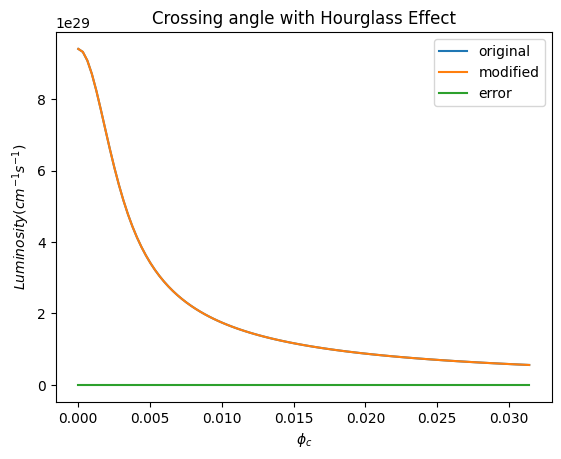

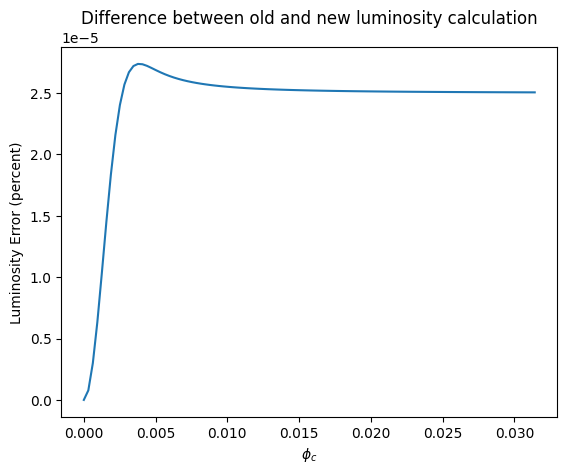

In [16]:
N = 100
Phi = np.linspace(0, np.pi/100, N + 1)
Luminosities = np.zeros(N + 1)
Luminosities_old = np.zeros(N + 1)
Error = np.zeros(N + 1)
for i, p in enumerate(Phi):
    Luminosities[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                     ex, ey, sz, p, neg_inf, pos_inf)*conversion
    Luminosities_old[i] = Luminosity_int_old(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                             ex, ey, sz, p, neg_inf, pos_inf)*conversion
Error = (Luminosities_old - Luminosities)/Luminosities_old*100
plt.plot(Phi, Luminosities, label = "original")
plt.plot(Phi, Luminosities_old, label = "modified")
plt.plot(Phi, Error, label = "error")
plt.title(r"Crossing angle with Hourglass Effect")
plt.ylabel(r"$Luminosity (cm^{-1}s^{-1})$")
plt.xlabel(r"$\phi_c$")
plt.legend()
plt.show()

plt.plot(Phi, Error)
plt.title(r"Difference between old and new luminosity calculation")
plt.ylabel("Luminosity Error (percent)")
plt.xlabel(r"$\phi_c$")
plt.show()

Difference between old and new calculation is small but not 0. \
Error is also small for small angles due to the $x^2\sin^2(\frac{\phi}{2})$ term (which is very small) not present in the new calculation.

## 2. Luminosity at a specific region with specific parameters <a name="chapter2"></a>
- $L_1$ is the integral evaluated between some bounds (s = -10 cm to s = 10 cm)
- $L_0$ is the integral evaluated over all of space
- Want to maximize integral between bounds $L_1$ while minimizing integral outside bounds ($L_0 - L_1$)

### 2.1 Varying $\beta^*_x$ <a name="chapter2.1"></a>

f, N1, N2 | s_star_x, s_star_y, ex, ey, sz, phi, piwinski angle | low_bound, hi_bound, neg_inf, pos_inf:
78000 200000000000.0 200000000000.0 | 0.0003620978604702388 0.00797014248860301 1e-07 1e-07 0.2 0.002 0.7581186566771536 | -0.1 0.1 -inf inf


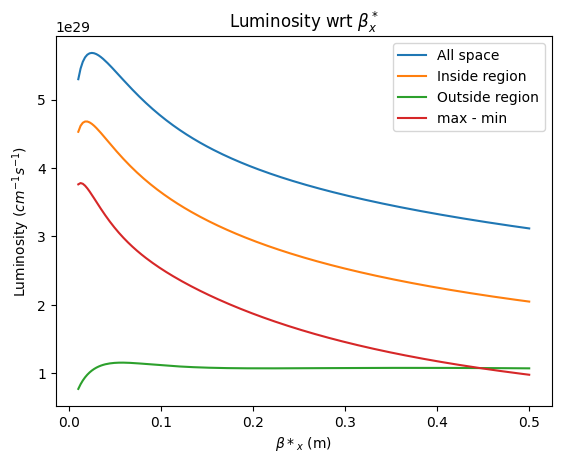

In [32]:
# Plot both with respect to beta_star
N = 200
Beta_starx = np.linspace(.01, .5, N + 1)
L_1_plot = np.zeros(N + 1)
L_0_plot = np.zeros(N + 1)

for i, bsx in enumerate(Beta_starx):
    #integral from low_bound to hi_bound
    L_1_plot[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, bsx, beta_star_y, 
                                 ex, ey, sz, phi, low_bound, hi_bound)*conversion
    #integral from -inf to inf
    L_0_plot[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, bsx, beta_star_y, 
                                 ex, ey, sz, phi, neg_inf, pos_inf)*conversion

print("f, N1, N2 | s_star_x, s_star_y, ex, ey, sz, phi, piwinski angle | low_bound, hi_bound, neg_inf, pos_inf:")
print(f, N1, N2, "|" , s_star_x, s_star_y, ex, ey, sz, phi, theta, "|", low_bound, hi_bound, neg_inf, pos_inf)

plt.plot(Beta_starx, L_0_plot, label = "All space")
plt.plot(Beta_starx, L_1_plot, label = "Inside region")
plt.plot(Beta_starx, L_0_plot - L_1_plot, label = "Outside region")

curve_betax_star = L_1_plot-(L_0_plot - L_1_plot) #maximize - minimize
plt.plot(Beta_starx, curve_betax_star, label = "max - min")
plt.title(r"Luminosity wrt $\beta^*_x$")
plt.ylabel(r"Luminosity ($cm^{-1}s^{-1}$)")
plt.xlabel(r"$\beta*_x$ (m)")
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

In [33]:
beta_starx_max = Beta_starx[np.argmax(curve_betax_star)]
print("Beta star x for max Luminosity:", beta_starx_max)

Beta star x for max Luminosity: 0.01245


### 2.2 Varying $\beta^*_y$ <a name="chapter2.2"></a>

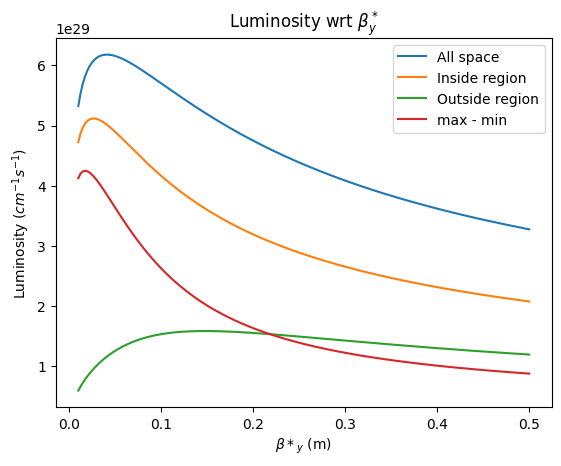

In [30]:
# Plot both with respect to beta_star
Beta_stary = np.linspace(.01, .5, N + 1)
L_1_plot = np.zeros(N + 1)
L_0_plot = np.zeros(N + 1)

for i, bsy in enumerate(Beta_stary):
    #integral from low_bound to hi_bound
    L_1_plot[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, bsy, 
                                 ex, ey, sz, phi, low_bound, hi_bound)*conversion
    #integral from -inf to inf
    L_0_plot[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, bsy, 
                                 ex, ey, sz, phi, neg_inf, pos_inf)*conversion

plt.plot(Beta_stary, L_0_plot, label = "All space")
plt.plot(Beta_stary, L_1_plot, label = "Inside region")
plt.plot(Beta_stary, L_0_plot - L_1_plot, label = "Outside region")

curve_betay_star = L_1_plot-(L_0_plot - L_1_plot) #maximize - minimize
plt.plot(Beta_stary, curve_betay_star, label = "max - min")
plt.title(r"Luminosity wrt $\beta^*_y$")
plt.ylabel(r"Luminosity ($cm^{-1}s^{-1}$)")
plt.xlabel(r"$\beta*_y$ (m)")
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

In [34]:
beta_stary_max = Beta_stary[np.argmax(curve_betay_star)]
print("Beta star y for max Luminosity:", beta_stary_max)

Beta star y for max Luminosity: 0.01735


### 2.3 Varying $\phi_c$ <a name="chapter2.3"></a>

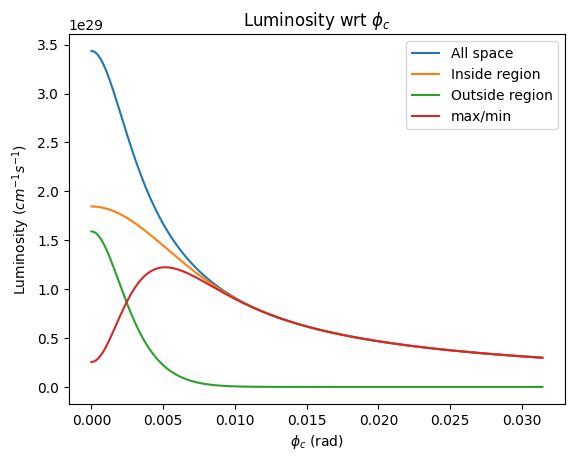

In [35]:
# Plot with respect to Phi
Phi = np.linspace(0, np.pi/100, N + 1)
L_1_plot2 = np.zeros(N + 1)
L_0_plot2 = np.zeros(N + 1)
for i, p in enumerate(Phi):
    L_1_plot2[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                  ex, ey, sz, p, low_bound, hi_bound)*conversion
    L_0_plot2[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                  ex, ey, sz, p, neg_inf, pos_inf)*conversion

plt.plot(Phi, L_0_plot2, label = "All space")
plt.plot(Phi, L_1_plot2, label = "Inside region")
plt.plot(Phi, L_0_plot2 - L_1_plot2, label = "Outside region")

curve_phi = L_1_plot2 - (L_0_plot2 - L_1_plot2)
plt.plot(Phi, curve_phi, label = "max/min")
plt.title(r"Luminosity wrt $\phi_c$")
plt.ylabel(r"Luminosity ($cm^{-1}s^{-1}$)")
plt.xlabel(r"$\phi_c$ (rad)")
plt.legend()
plt.show()

In [36]:
phi_max = Phi[np.argmax(curve_phi)]
print("Phi for max Luminosity:", phi_max)

Phi for max Luminosity: 0.005183627878423159


### 2.4 Varying $\sigma_z$ <a name="chapter2.4"></a>

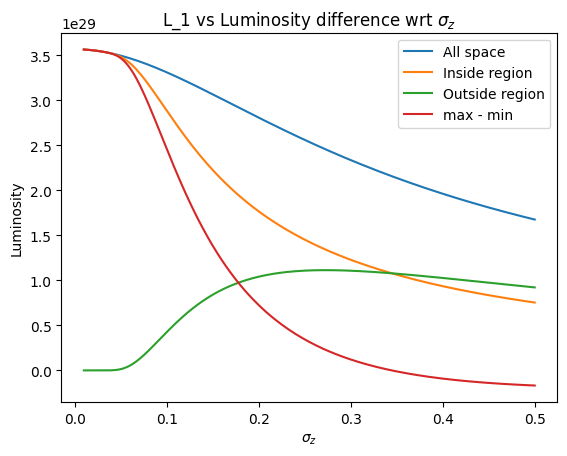

In [38]:
# Plot with respect to sigma_z
Sigma_z = np.linspace(.01, .5, N + 1)
L_1_plot_sz = np.zeros(N + 1)
L_0_plot_sz = np.zeros(N + 1)
for i, s_z in enumerate(Sigma_z):
    L_1_plot_sz[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                    ex, ey, s_z, phi, low_bound, hi_bound)*conversion
    L_0_plot_sz[i] = Luminosity_int(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                    ex, ey, s_z, phi, neg_inf, pos_inf)*conversion

plt.plot(Sigma_z, L_0_plot_sz, label = "All space")
plt.plot(Sigma_z, L_1_plot_sz, label = "Inside region")
plt.plot(Sigma_z, L_0_plot_sz - L_1_plot_sz, label = "Outside region")

curve_sigma_z = L_1_plot_sz - (L_0_plot_sz - L_1_plot_sz)
plt.plot(Sigma_z, curve_sigma_z, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_z$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_z$")
plt.legend()
plt.show()

In [40]:
sigma_z_max = Sigma_z[np.argmax(curve_sigma_z)]
print("bunch length for max Luminosity:", sigma_z_max)

bunch length for max Luminosity: 0.01


In [ ]:
#old stuff

### 2.3 Varying $\epsilon_x$ <a name="chapter2.3"></a>

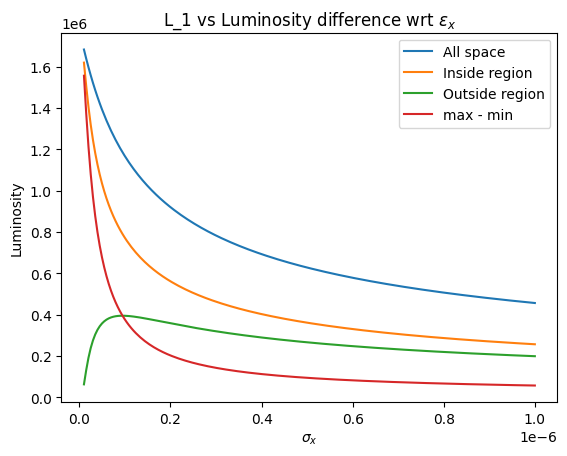

In [32]:
# Plot with respect to eps_x
Eps_x = np.linspace(1E-8, 1E-6, N + 1) #m
L_1_plot3 = np.zeros(N + 1)
L_0_plot3 = np.zeros(N + 1)
for i, e_x in enumerate(Eps_x):
    L_1_plot3[i] = Luminosity_int(f, N1, N2, bs, e_x, ey, sz, phi, low_bound, hi_bound)
    L_0_plot3[i] = Luminosity_int(f, N1, N2, bs, e_x, ey, sz, phi, neg_inf, pos_inf)

plt.plot(Eps_x, L_0_plot3, label = "All space")
plt.plot(Eps_x, L_1_plot3, label = "Inside region")
plt.plot(Eps_x, L_0_plot3 - L_1_plot3, label = "Outside region")

curve_eps_x = L_1_plot3 - (L_0_plot3 - L_1_plot3)
plt.plot(Eps_x, curve_eps_x, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\epsilon_x$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_x$")
plt.legend()
plt.show()

In [33]:
eps_x_max = Eps_x[np.argmax(curve_eps_x)]
print("epsilon_x for max Luminosity:", eps_x_max)

epsilon_x for max Luminosity: 1e-08


### 2.4 Varying $\epsilon_y$ <a name="chapter2.4"></a>

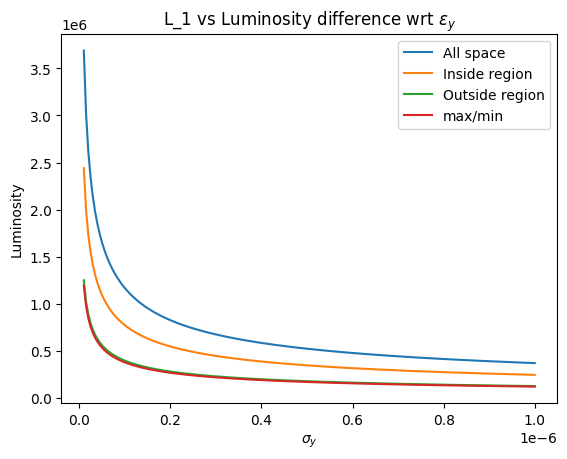

In [34]:
# Plot with respect to eps_y
Eps_y = np.linspace(1E-8, 1E-6, N + 1) #m
L_1_plot4 = np.zeros(N + 1)
L_0_plot4 = np.zeros(N + 1)
for i, e_y in enumerate(Eps_y):
    L_1_plot4[i] = Luminosity_int(f, N1, N2, bs, ex, e_y, sz, phi, low_bound, hi_bound)
    L_0_plot4[i] = Luminosity_int(f, N1, N2, bs, ex, e_y, sz, phi, neg_inf, pos_inf)

plt.plot(Eps_y, L_0_plot4, label = "All space")
plt.plot(Eps_y, L_1_plot4, label = "Inside region")
plt.plot(Eps_y, L_0_plot4 - L_1_plot4, label = "Outside region")

curve_eps_y = L_1_plot4 - (L_0_plot4 - L_1_plot4)
plt.plot(Eps_y, curve_eps_y, label = "max/min")
plt.title(r"L_1 vs Luminosity difference wrt $\epsilon_y$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_y$")
#plt.yscale("log")
plt.legend()
plt.show()

In [35]:
eps_y_max = Eps_y[np.argmax(curve_eps_y)]
print("epsilon_y for max Luminosity:", eps_y_max)

epsilon_y for max Luminosity: 1e-08


## 3. s-offset ($\vec{s}^*$) <a name="chapter3"></a>

Integrate integrand but now $\vec{s}^* \neq$ 0 at IP:\
$\beta(s) = \beta^*(1 + (\frac{(s - s^*)}{\beta^*})^2)$

This also means that $\beta(s)$ will be different for x and y as well:\
$\beta_i(s) = \beta^*(1 + (\frac{(s - s_i^*)}{\beta^*})^2); i = x, y$

Combine with previous result:\
$L = \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x^2\sigma_y\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

Where $\sigma_i(s) = \sqrt{\epsilon_i\beta_i(s)}$

In [38]:
#Integrand with s* to evaluate wrt s
# Parameters given: f, N1, N2, s*_x, s*_y, beta_star, ex, ey, sz, phi
def Integrand_s_star(s, f, N1, N2, ssx, ssy, bs, ex, ey, sz, phi):
    beta_x = bs*(1 + ((s - ssx)/bs)**2)
    beta_y = bs*(1 + ((s - ssy)/bs)**2)
    sx = np.sqrt(ex*beta_x)
    sy = np.sqrt(ey*beta_y)
    
    denom = 4*np.pi**1.5 * sx*sy*sz
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2) * num/denom


In [39]:
# s* initial conditions
# if want to change other parameters, go to sec 1
s_star_x = 0
s_star_y = 0

In [40]:
# Using Scipy
Luminosity_int_s_star = (lambda f, N1, N2, ssx, ssy, bs, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand_s_star, a, b, 
                        args = (f, N1, N2, ssx, ssy, bs, ex, ey, sz, phi))[0])
L0_s_star = Luminosity_int_s_star(f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi, neg_inf, pos_inf)
L1_s_star = Luminosity_int_s_star(f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi, low_bound, hi_bound)

print("Luminosity for (s_star_x, s_star_y) = (%f, %f):"%(s_star_x, s_star_y), L0_s_star)
print("Luminosity for (s_star_x, s_star_y) = (%f, %f):"%(s_star_x, s_star_y), L1_s_star)

Luminosity for (s_star_x, s_star_y) = (0.000000, 0.000000): 2227612.7653371557
Luminosity for (s_star_x, s_star_y) = (0.000000, 0.000000): 1708029.7250030076


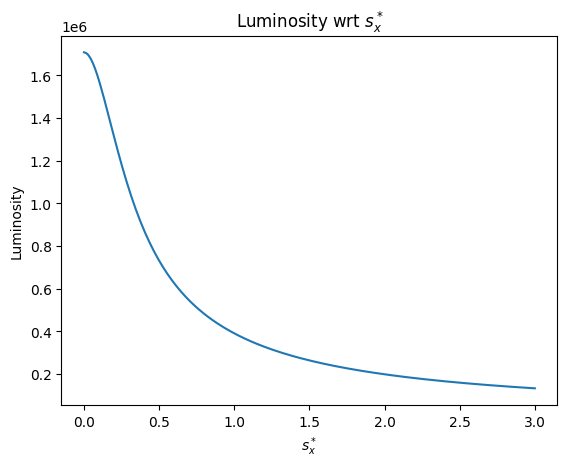

In [41]:
S_star_x = np.linspace(0, 3, N + 1)
Luminosities_s_star_x = np.zeros(N + 1)
for i, ssx in enumerate(S_star_x):
    Luminosities_s_star_x[i] = Luminosity_int_s_star(f, N1, N2, ssx, s_star_y, beta_star, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
plt.plot(S_star_x, Luminosities_s_star_x)
plt.title(r"Luminosity wrt $s_x^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$s_x^*$")
plt.show()

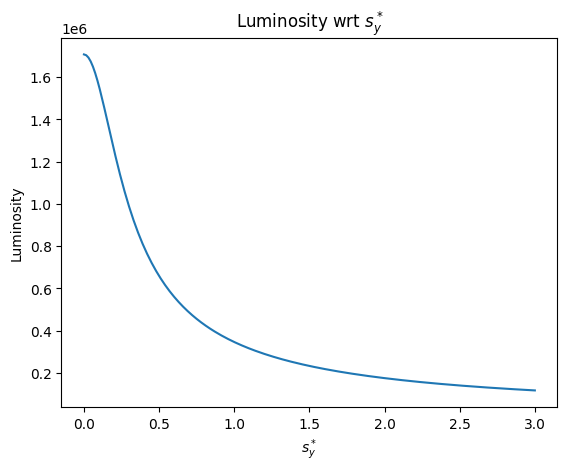

In [42]:
S_star_y = np.linspace(0, 3, N + 1)
Luminosities_s_star_y = np.zeros(N + 1)
for i, ssy in enumerate(S_star_y):
    Luminosities_s_star_y[i] = Luminosity_int_s_star(f, N1, N2, s_star_x, ssy, beta_star, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
plt.plot(S_star_y, Luminosities_s_star_y)
plt.title(r"Luminosity wrt $s_y^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$s_y^*$")
plt.show()

## 4. $\vec{\beta}^*$ <a name="chapter4"></a>
$\beta^*$ is split into two parameters: $\beta^*_x$ and $\beta^*_y$

$\rightarrow \beta_i(s) = \beta^*_i(1 + (\frac{(s - s_i^*)}{\beta^*_i})^2); i = x, y$

Combine with previous result:\
$L = \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x^2\sigma_y\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

Where $\sigma_i(s) = \sqrt{\epsilon_i\beta_i(s)}$

In [7]:
#Integrand with b*_i to evaluate wrt s
# Parameters given: f, N1, N2, s*_x, s*_y, beta_star_x, beta_star_y, ex, ey, sz, phi
def Integrand_b_star(s, f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi):
    beta_x = bsx*(1 + ((s - ssx)/bsx)**2)
    beta_y = bsy*(1 + ((s - ssy)/bsy)**2)
    sx = np.sqrt(ex*beta_x)
    sy = np.sqrt(ey*beta_y)
    
    denom = 4*np.pi**1.5 * sx*sy*sz
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2) * num/denom


In [10]:
Luminosity_int_b_star = (lambda f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand_b_star, a, b, 
                        args = (f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi))[0])
L1 = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
L0 = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, beta_star_x, beta_star_y, 
                                                     ex, ey, sz, phi, neg_inf, pos_inf)
print(L1, L0)

566375.010957463 899998.3375887461


In [44]:
# b* initial conditions
# if want to change other parameters, go to sec 1
b_star_x = 0.2
b_star_y = 0.2
phi = 2E-3

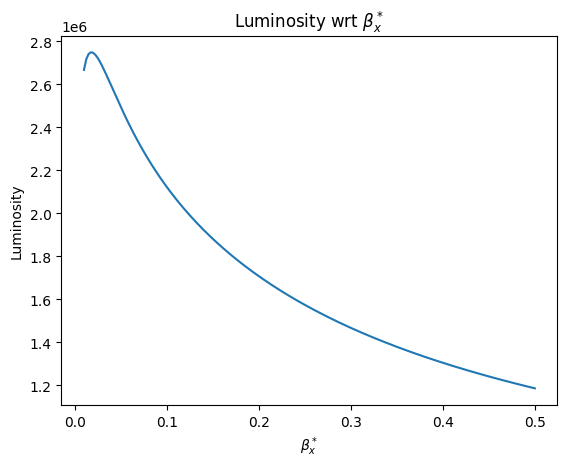

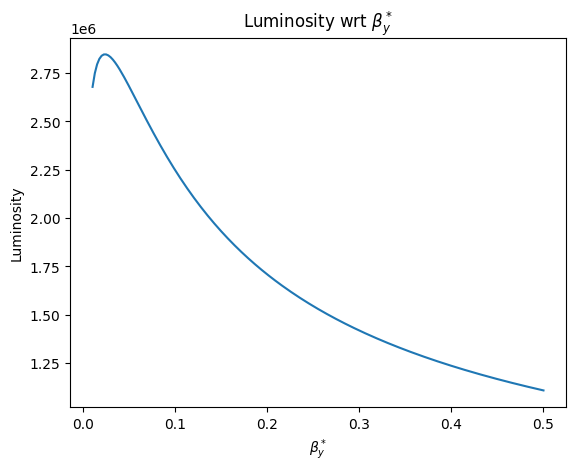

In [45]:
B_star_x = np.linspace(0.01, .5, N + 1)
B_star_y = np.linspace(0.01, .5, N + 1)
Luminosities_b_star_x = np.zeros(N + 1)
Luminosities_b_star_y = np.zeros(N + 1)
for i, bsx in enumerate(B_star_x):
    Luminosities_b_star_x[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, bsx, b_star_y, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
for i, bsy in enumerate(B_star_y):
    Luminosities_b_star_y[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, b_star_x, bsy, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
plt.plot(B_star_x, Luminosities_b_star_x)
plt.title(r"Luminosity wrt $\beta_x^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\beta_x^*$")
plt.show()

plt.plot(B_star_y, Luminosities_b_star_y)
plt.title(r"Luminosity wrt $\beta_y^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\beta_y^*$")
plt.show()

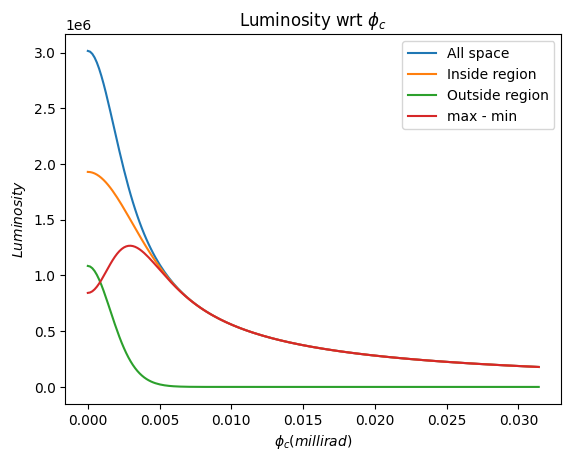

In [46]:
Phi = np.linspace(0, np.pi/100, N + 1)
L_1_plotphi = np.zeros(N + 1)
L_0_plotphi = np.zeros(N + 1)
for i, p in enumerate(Phi):
    L_1_plotphi[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, b_star_x, b_star_y, 
                                                     ex, ey, sz, p, low_bound, hi_bound)
    L_0_plotphi[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, b_star_x, b_star_y, 
                                                     ex, ey, sz, p, neg_inf, pos_inf)

plt.plot(Phi, L_0_plotphi, label = "All space")
plt.plot(Phi, L_1_plotphi, label = "Inside region")
plt.plot(Phi, L_0_plotphi - L_1_plotphi, label = "Outside region")

curve_phi = L_1_plotphi - (L_0_plotphi - L_1_plotphi)
plt.plot(Phi, curve_phi, label = "max - min")
plt.title(r"Luminosity wrt $\phi_c$")
plt.ylabel(r"$Luminosity$")
plt.xlabel(r"$\phi_c  (millirad)$")
plt.legend()
plt.show()